In [1]:
import pandas as pd



In [2]:
df = pd.read_csv("sales_performance_data.csv")

In [ ]:
df.columns

Index(['employee_id', 'employee_name', 'created', 'dated', 'lead_taken',
       'tours_booked', 'applications', 'tours_per_lead', 'apps_per_tour',
       'apps_per_lead', 'revenue_confirmed', 'revenue_pending',
       'revenue_runrate', 'tours_in_pipeline', 'avg_deal_value_30_days',
       'avg_close_rate_30_days', 'estimated_revenue', 'tours', 'tours_runrate',
       'tours_scheduled', 'tours_pending', 'tours_cancelled', 'mon_text',
       'tue_text', 'wed_text', 'thur_text', 'fri_text', 'sat_text', 'sun_text',
       'mon_call', 'tue_call', 'wed_call', 'thur_call', 'fri_call', 'sat_call',
       'sun_call'],
      dtype='object')

# Misssing Value anaalysis


agr isisng values hoti toh unko fill krtay
mean median ya phir hum jahann ull wahan delete krkstay rows

In [ ]:
df.isna().sum()

employee_id               0
employee_name             9
created                   0
dated                     0
lead_taken                0
tours_booked              0
applications              0
tours_per_lead            0
apps_per_tour             0
apps_per_lead             0
revenue_confirmed         0
revenue_pending           0
revenue_runrate           0
tours_in_pipeline         0
avg_deal_value_30_days    0
avg_close_rate_30_days    0
estimated_revenue         0
tours                     0
tours_runrate             0
tours_scheduled           0
tours_pending             0
tours_cancelled           0
mon_text                  0
tue_text                  0
wed_text                  0
thur_text                 0
fri_text                  0
sat_text                  0
sun_text                  0
mon_call                  0
tue_call                  0
wed_call                  0
thur_call                 0
fri_call                  0
sat_call                  0
sun_call            

missing values only in employee name, so making two dfs one that have the null values one htat doesnt for

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df['dated'] = pd.to_datetime(df['dated'])
df.sort_values('dated', inplace=True)

Time Series Analysis


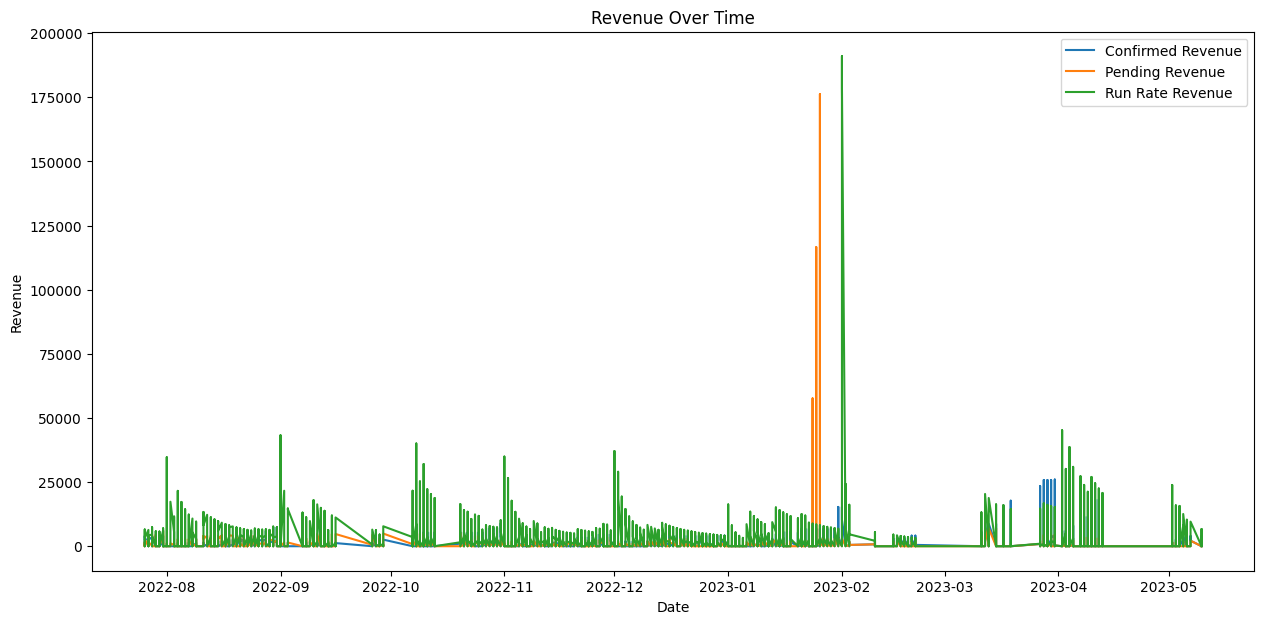

In [5]:
plt.figure(figsize=[15,7])
plt.plot(df['dated'], df['revenue_confirmed'], label='Confirmed Revenue')
plt.plot(df['dated'], df['revenue_pending'], label='Pending Revenue')
plt.plot(df['dated'], df['revenue_runrate'], label='Run Rate Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.legend()
plt.show()

Comparative Analysis For top salesMan

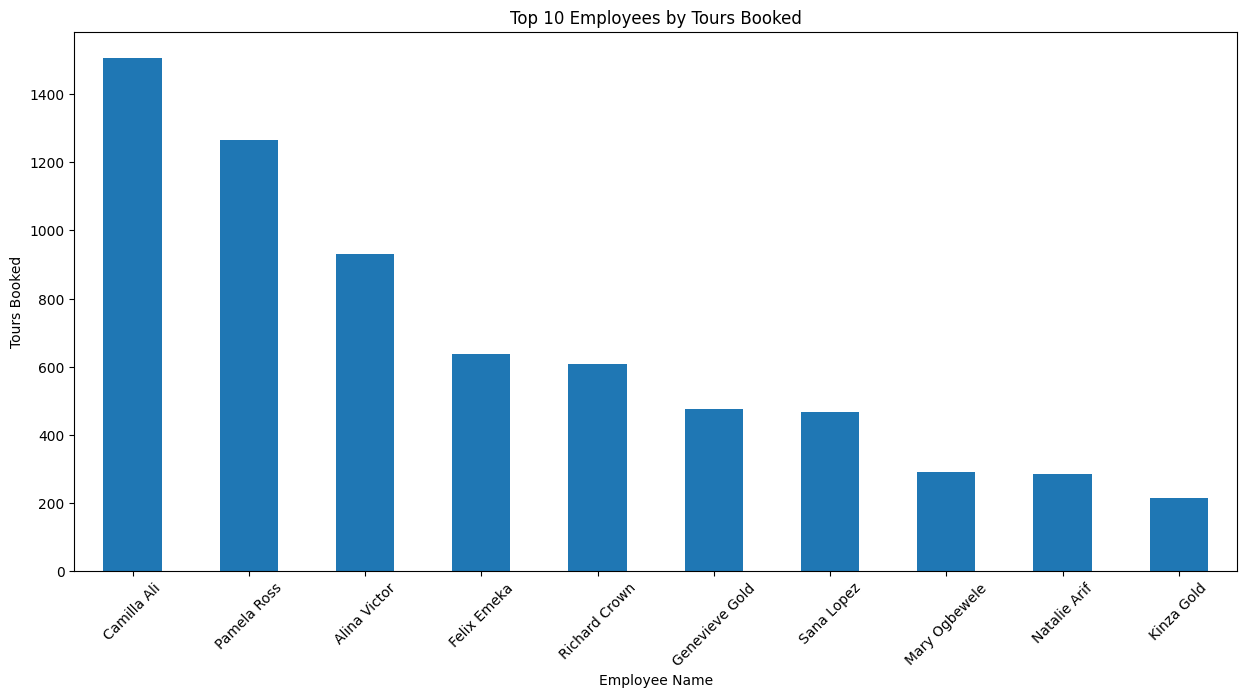

In [6]:
plt.figure(figsize=[15,7])
top_employees = df.groupby('employee_name')['tours_booked'].sum().sort_values(ascending=False).head(10)
top_employees.plot(kind='bar')
plt.xlabel('Employee Name')
plt.ylabel('Tours Booked')
plt.title('Top 10 Employees by Tours Booked')
plt.xticks(rotation=45)
plt.show()


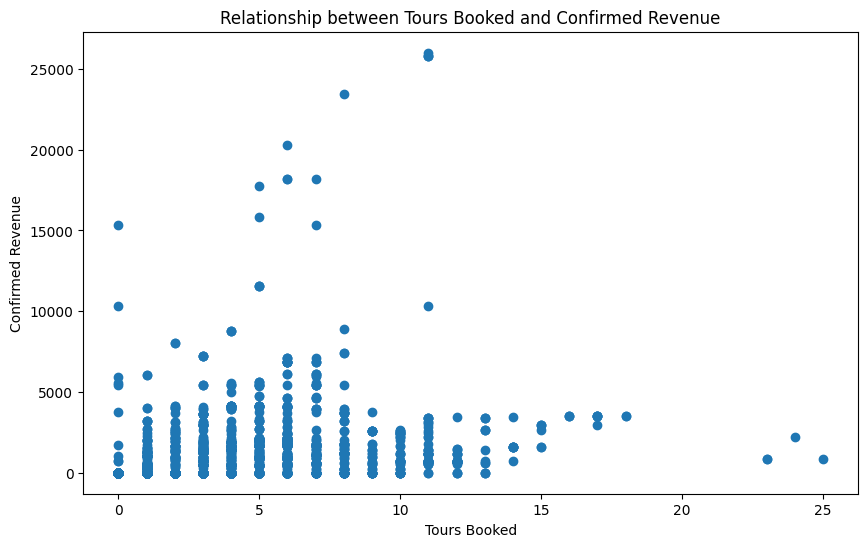

In [7]:
plt.figure(figsize=[10,6])
plt.scatter(df['tours_booked'], df['revenue_confirmed'])
plt.xlabel('Tours Booked')
plt.ylabel('Confirmed Revenue')
plt.title('Relationship between Tours Booked and Confirmed Revenue')
plt.show()

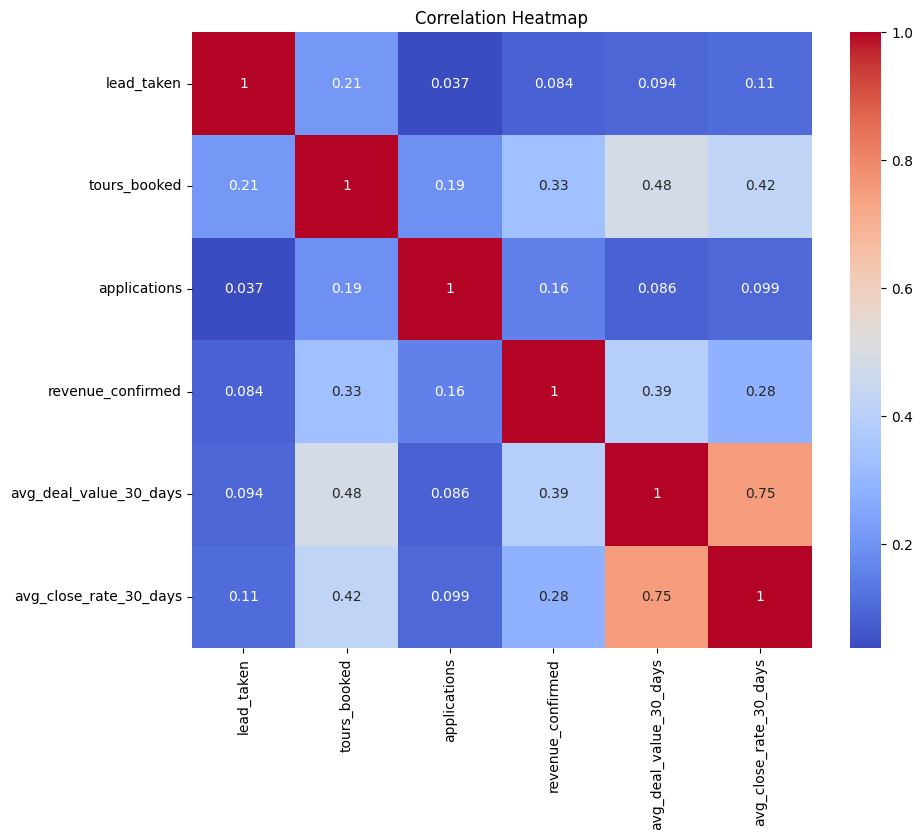

In [8]:
import seaborn as sns

# Selecting numerical columns for correlation analysis
numerical_cols = ['lead_taken', 'tours_booked', 'applications', 'revenue_confirmed', 'avg_deal_value_30_days', 'avg_close_rate_30_days']
corr = df[numerical_cols].corr()

plt.figure(figsize=[10,8])
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


employee_id               0
employee_name

In [ ]:
df[df['employee_id']==173]

In [ ]:
df['employee_id'].value_counts()

In [9]:
def calculate_benchmarks(df):
    benchmarks = {}
    metrics = ['lead_taken', 'tours_booked', 'applications', 'revenue_confirmed', 'tours_per_lead', 'apps_per_tour', 'apps_per_lead', 'revenue_runrate']
    call_metrics = ['mon_call', 'tue_call', 'wed_call', 'thur_call', 'fri_call', 'sat_call', 'sun_call']
    message_metrics = ['mon_text', 'tue_text', 'wed_text', 'thur_text', 'fri_text', 'sat_text', 'sun_text']

    for metric in metrics + call_metrics + message_metrics:
        benchmarks[metric] = {
            'average': df[metric].mean(),
            'median': df[metric].median()
        }
    return benchmarks


In [10]:
def analyze_rep_performance(rep_id, df, benchmarks):
    # Filter data for the specific sales representative
    rep_data = df[df['employee_id'] == rep_id]

    # Extracting and calculating individual and team performance metrics
    performance_comparison = {}
    for metric, values in benchmarks.items():
        rep_metric_value = rep_data[metric].mean()  # Assuming mean value is representative for individual metrics
        performance_comparison[metric] = {
            'individual': rep_metric_value,
            'team_average': values['average'],
            'team_median': values['median'],
            'above_average': rep_metric_value > values['average']
        }

    # Call and Message Analysis
    call_analysis = {metric: rep_data[metric].sum() for metric in benchmarks.keys() if 'call' in metric}
    message_analysis = {metric: rep_data[metric].sum() for metric in benchmarks.keys() if 'text' in metric}

    # Integration of performance comparison and communication metrics into feedback
    feedback = {
        'performance_comparison': performance_comparison,
        'call_summary': call_analysis,
        'message_summary': message_analysis
    }
    return feedback


In [12]:
# Calculate benchmarks based on the entire sales team
benchmarks = calculate_benchmarks(df)

In [13]:
rep_id = 183
rep_feedback = analyze_rep_performance(rep_id, df, benchmarks)

In [14]:
rep_feedback


{'performance_comparison': {'lead_taken': {'individual': 92.9030303030303,
   'team_average': 56.54574132492114,
   'team_median': 39.0,
   'above_average': True},
  'tours_booked': {'individual': 9.139393939393939,
   'team_average': 3.178627760252366,
   'team_median': 2.0,
   'above_average': True},
  'applications': {'individual': 4.115151515151515,
   'team_average': 1.5410094637223974,
   'team_median': 1.0,
   'above_average': True},
  'revenue_confirmed': {'individual': 1045.8848484848486,
   'team_average': 840.5721608832807,
   'team_median': 0.0,
   'above_average': True},
  'tours_per_lead': {'individual': 11.958181818181819,
   'team_average': 7.742152996845426,
   'team_median': 5.2,
   'above_average': True},
  'apps_per_tour': {'individual': 42.89878787878787,
   'team_average': 29.729810725552046,
   'team_median': 20.0,
   'above_average': True},
  'apps_per_lead': {'individual': 5.869090909090909,
   'team_average': 3.6544558359621453,
   'team_median': 1.2,
   'abov

In [ ]:
!pip install gradio_client

google-t5/t5-small

In [19]:
from gradio_client import Client

client = Client("ajeetkumar01/Text-Summarizer")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loaded as API: https://ajeetkumar01-text-summarizer.hf.space ✔


In [20]:
def dict_to_text(data):
    performance_parts = []
    for category, metrics in data['performance_comparison'].items():
        above_or_below = "above" if metrics['above_average'] else "below"
        part = f"In {category}, the individual's performance was {above_or_below} the team average with a value of {metrics['individual']:.2f} compared to the team's average of {metrics['team_average']:.2f}."
        performance_parts.append(part)

    call_parts = [f"{day}: {count}" for day, count in data['call_summary'].items()]
    message_parts = [f"{day}: {count}" for day, count in data['message_summary'].items()]

    text = " ".join(performance_parts) + " Weekly call totals are " + ", ".join(call_parts) + ". Weekly message totals are " + ", ".join(message_parts) + "."
    result = client.predict(
		text,	# str in 'Input Text' Textbox component
		api_name="/predict"
)
    return result

In [21]:
print(dict_to_text(rep_feedback))

in tours_per_lead, the individual's performance was above the team average with a value of 9.14 compared to the team's average of 56.55 . in revenue_confirmed, he's exceeded the team . average of 840.57 .


In [22]:
def generate_performance_summary(benchmarks):
    # Extract key metrics for summary
    leads_taken_avg = benchmarks['lead_taken']['average']
    tours_booked_avg = benchmarks['tours_booked']['average']
    revenue_confirmed_avg = benchmarks['revenue_confirmed']['average']
    revenue_runrate_avg = benchmarks['revenue_runrate']['average']

    # Calls and Texts summary
    call_avg = sum(benchmarks[metric]['average'] for metric in benchmarks if 'call' in metric) / 7  # Average over 7 days
    text_avg = sum(benchmarks[metric]['average'] for metric in benchmarks if 'text' in metric) / 7  # Average over 7 days

    # Constructing the summary sentence
    summary = (
        f"The sales team has an average of {leads_taken_avg:.1f} leads taken, {tours_booked_avg:.1f} tours booked, "
        f"and a confirmed revenue of ${revenue_confirmed_avg:.2f} indicating robust sales activity. "
        f"The revenue runrate stands at an average of ${revenue_runrate_avg:.2f}, showcasing potential growth. "
        f"On average, the team makes {call_avg:.1f} calls and sends {text_avg:.1f} texts per day, highlighting active communication."
    )

    return summary

In [23]:
summary_sentence = generate_performance_summary(benchmarks)
print(summary_sentence)

The sales team has an average of 56.5 leads taken, 3.2 tours booked, and a confirmed revenue of $840.57 indicating robust sales activity. The revenue runrate stands at an average of $2694.49, showcasing potential growth. On average, the team makes 8.0 calls and sends 37.8 texts per day, highlighting active communication.


In [24]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.8 MB/s eta 0:00:00


In [25]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forecast_sales_metric(df, metric_name='revenue_confirmed', periods=12):
    """
    Forecast a specific sales metric using the ARIMA model.

    Parameters:
    - df: DataFrame containing your sales data.
    - metric_name: String name of the metric to forecast (e.g., 'revenue_confirmed').
    - periods: Number of periods to forecast into the future.

    Returns:
    - forecast: The forecasted values for the specified number of future periods.
    """

    # Ensure 'dated' is in datetime format and sort the DataFrame by date
    df['dated'] = pd.to_datetime(df['dated'])
    df.sort_values('dated', inplace=True)

    # Extract the time series
    ts = df.groupby('dated')[metric_name].sum()  # Assuming you want to sum the metric by date

    # Fit the ARIMA model
    auto_model = auto_arima(ts, seasonal=True, m=12, stepwise=True, suppress_warnings=True, error_action="ignore")

    # Fit the SARIMAX model
    order = auto_model.order
    seasonal_order = auto_model.seasonal_order
    model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Forecast
    forecast = model_fit.forecast(steps=periods)

    return forecast




In [26]:
abc=forecast_sales_metric(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [27]:
abc

203    17591.273340
204    18322.904131
205    18713.536174
206    18922.102292
207    19033.459836
208    19092.915816
209    19124.660531
210    19141.609657
211    19150.659128
212    19155.490819
213    19158.070553
214    19159.447924
Name: predicted_mean, dtype: float64

In [ ]:
print("hi")

hi
